# ** DATA ANALYSIS PROJECT- BLINKIT ANALYSIS **

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Connection with MYSQL

In [3]:
import mysql.connector
import pandas as pd
cnx=mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="p@rths@mth@@n")

In [5]:
query="select * from blinkit_sales.data"

In [6]:
df=pd.read_sql(query,cnx)

C:\Users\Dell\AppData\Local\Temp\ipykernel_13856\3864670969.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,cnx)


In [7]:
cnx.close()

## Checking the data and getting information

In [8]:
print(df)

     Item Fat Content Item Identifier              Item Type  \
0             Regular           FDX32  Fruits and Vegetables   
1             Low Fat           NCB42     Health and Hygiene   
2             Regular           FDR28           Frozen Foods   
3             Regular           FDL50                 Canned   
4             Low Fat           DRI25            Soft Drinks   
...               ...             ...                    ...   
8518          Low Fat           NCT53     Health and Hygiene   
8519          Low Fat           FDN09            Snack Foods   
8520          Low Fat           DRE13            Soft Drinks   
8521          Regular           FDT50                  Dairy   
8522          Regular           FDM58            Snack Foods   

      Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                          2012            OUT049               Tier 1   
1                          2022            OUT018               Tier 3   
2        

In [9]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Total Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [12]:
print("Size:",df.shape)

Size: (8523, 12)


In [14]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Total Sales', 'Rating'],
      dtype='object')

In [15]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Total Sales                  float64
Rating                       float64
dtype: object

#### Data cleaning not required as we already did that in mysql 
#### Checking for the cleaned data

In [18]:
df["Item Fat Content"].unique()

array(['Regular', 'Low Fat'], dtype=object)

###### if not cleaned then:
###### df["Item Fat Content']=df["Item Fat Content"].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
###### df["Item Fat Content"].unique()

## Business Requirements

### KPI's Requirement

In [33]:
#Total Sales
total_sales=df['Total Sales'].sum()
print(f"Total Sales:${total_sales:.2f}")

#Average Sales
avg_sales=df['Total Sales'].mean()
print(f"Average Sales:${avg_sales:.0f}")

#No of Items Sold
items_sold=df['Total Sales'].count()
print(f"Number of Items Sold:{items_sold}")

#Average Ratings
avg_rating=df['Rating'].mean()
print(f"Average Rating:{avg_rating:.0f}")

Total Sales:$1201681.48
Average Sales:$141
Number of Items Sold:8523
Average Rating:4


### Charts Requirements

#### Total Sales by Fat Content

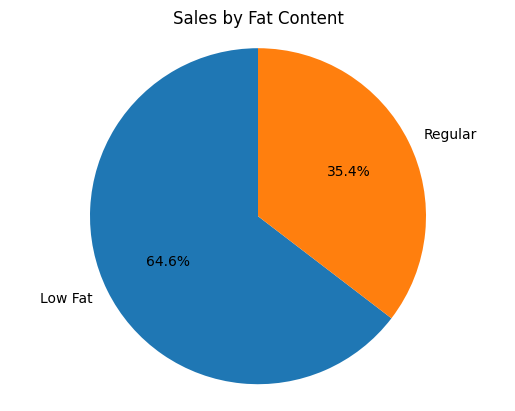

In [35]:
sales_by_fat=df.groupby('Item Fat Content')['Total Sales'].sum()
plt.pie(sales_by_fat,labels=sales_by_fat.index,
                     autopct='%.1f%%',
                     startangle=90)
plt.title('Sales by Fat Content')
plt.axis('equal')
plt.show()

#### Total Sales by Item Type

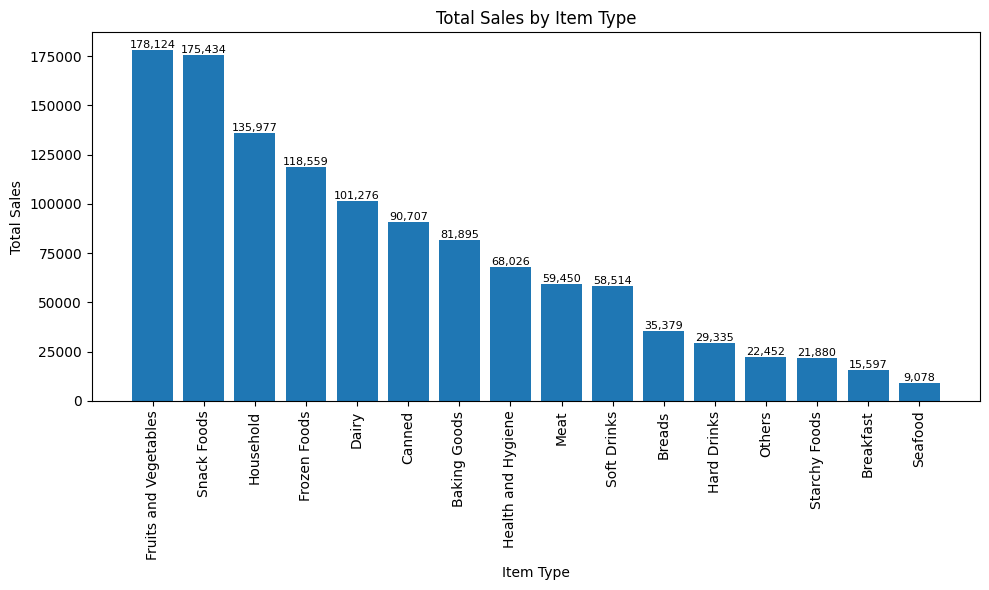

In [38]:
sales_by_type=df.groupby('Item Type')['Total Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
bars=plt.bar(sales_by_type.index,sales_by_type.values)

plt.xticks(rotation=90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

#### Fat Content by Outlet for Total Sales

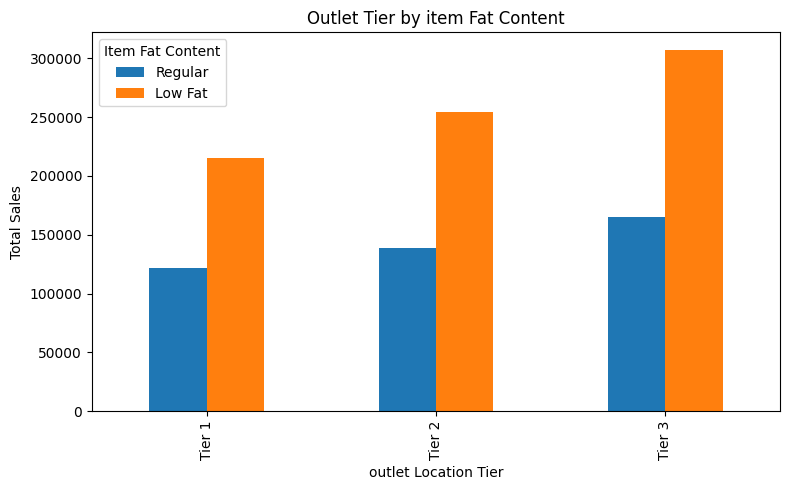

In [44]:
grouped=df.groupby(['Outlet Location Type', 'Item Fat Content'])['Total Sales'].sum().unstack()
grouped= grouped[['Regular','Low Fat']]

ax=grouped.plot(kind='bar',figsize=(8,5), title='Outlet Tier by item Fat Content')
plt.xlabel('outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

#### Total Sales by Outlet Establishment

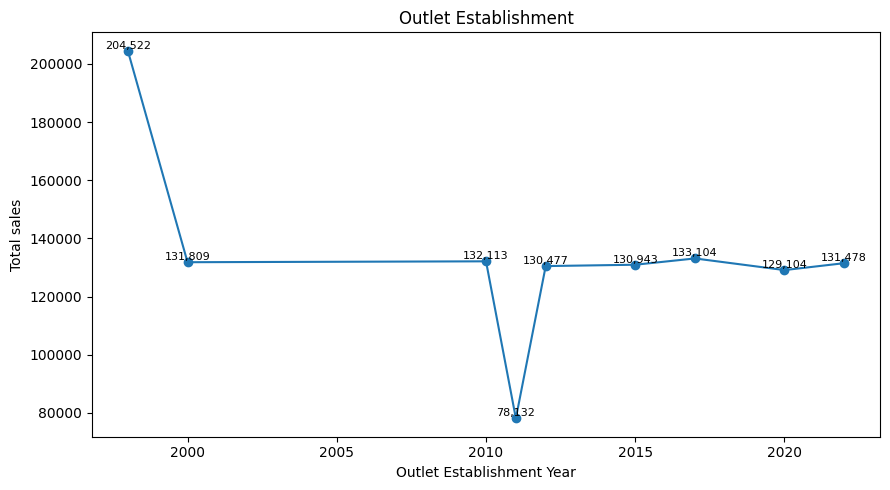

In [51]:
sales_by_year= df.groupby('Outlet Establishment Year')['Total Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total sales')
plt.title('Outlet Establishment')

for x,y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}',ha='center',va='bottom',fontsize=8)

plt.tight_layout()
plt.show()

#### Total Sales by Outlet Size

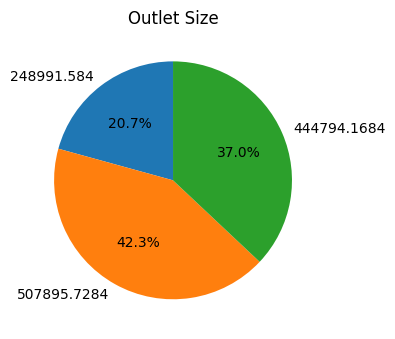

In [57]:
sales_by_size=df.groupby('Outlet Size')['Total Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

#### Total Sales by Outlet Location

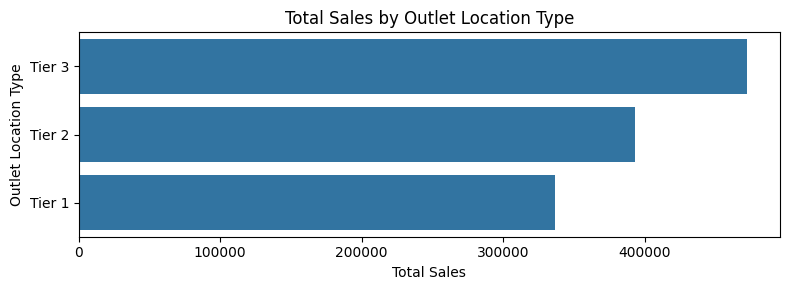

In [59]:
sales_by_location= df.groupby('Outlet Location Type')['Total Sales'].sum().reset_index().sort_values('Total Sales',ascending=False)

plt.figure(figsize=(8,3))
ax=sns.barplot(x='Total Sales', y='Outlet Location Type', data=sales_by_location)

plt.title('Total Sales by Outlet Location Type')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()